## Demo for Knn Classificaiton and PCA on Wine Dataset


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Loading data

In [2]:
names=['class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','diluted wines','Proline']    
df = pd.read_csv('https://raw.githubusercontent.com/sekhargullapalli/exploring-data-science/master/data/wine.csv', header=None, names=names)  
df.head() 

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## 2. Seperate date into labels and features & z-score normalization

In [3]:
dfCat =df[['class']]
del df['class']
df = (df - df.mean())/df.std()

## 3. Split into test train sets and Knn Classification with k=5

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df, dfCat, test_size = 0.25, random_state = 0)
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

## 4.Plotting the confusion matrix

[Text(0, 0.5, '1'), Text(0, 1.5, '2'), Text(0, 2.5, '3')]

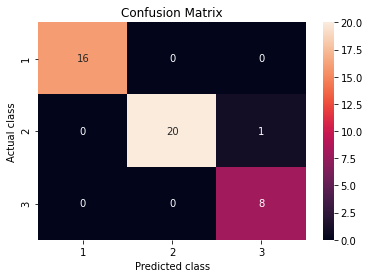

In [5]:
cm = confusion_matrix(y_test, y_pred)    
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)
ax.set_xlabel('Predicted class');ax.set_ylabel('Actual class'); 
ax.set_title('Confusion Matrix'); 
lab = dfCat["class"].unique().tolist()
ax.xaxis.set_ticklabels(lab); ax.yaxis.set_ticklabels(lab)

## Section 2: Dimensionality reduction using PCA
=========================================================

## 5. Calculating 3 principal components and order reduced dataframe

In [6]:
principal_components = PCA(n_components=3).fit_transform(df)
pcDf = pd.DataFrame(data=principal_components, columns=['PC1','PC2','PC3'])    
loworderDf = pd.concat([pcDf,dfCat],axis=1)   
loworderDf.head()

,PC1,PC2,PC3,class
0,3.307421,-1.439402,-0.165273,1
1,2.203250,0.332455,-2.020757,1
2,2.509661,-1.028251,0.980054,1
3,3.746497,-2.748618,-0.175696,1
4,1.006070,-0.867384,2.020987,1


## 6. Plotting the wine class distribution in new space

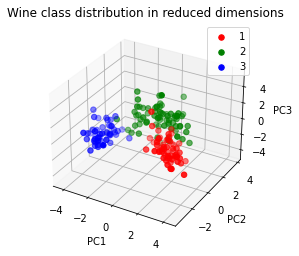

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 
lab = dfCat["class"].unique().tolist()
col=['r','g','b']
for l,c in zip(lab,col):
    subclass = loworderDf['class']==l
    ax.scatter(loworderDf.loc[subclass,'PC1']
    ,loworderDf.loc[subclass,'PC2']
    ,loworderDf.loc[subclass,'PC3']
    ,c = c, s=30)
ax.legend(lab)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3') 
ax.set_title('Wine class distribution in reduced dimensions')
ax.grid()

## 7. Performing Knn classification on order reduced data and plotting the confusion matrix

[Text(0, 0.5, '1'), Text(0, 1.5, '2'), Text(0, 2.5, '3')]

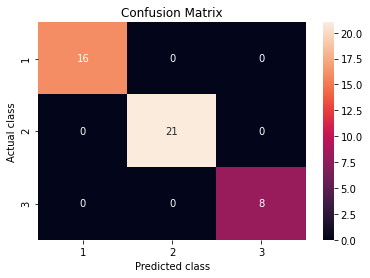

In [8]:
dfCat =loworderDf[['class']]
del loworderDf['class']
loworderDf = (loworderDf - loworderDf.mean())/loworderDf.std()
X_train, X_test, y_train, y_test = train_test_split(loworderDf, dfCat, test_size = 0.25, random_state = 0)
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)    
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)
ax.set_xlabel('Predicted class');ax.set_ylabel('Actual class'); 
ax.set_title('Confusion Matrix'); 
lab = dfCat["class"].unique().tolist()
ax.xaxis.set_ticklabels(lab); ax.yaxis.set_ticklabels(lab)